# Lending Club Case Study

<b>A. About Loan Data <br> </b>
1. Read the loan.csv in dataframe and see the information -
Here, we can see that there are total of 111 parameters in loan.csv file, i.e. -- 
<br>
float variables - 74, integer variables - 13, and string variables - 24 
<br>
2. Total number of rows in dataset is 39717 <br>
3. There are no duplicates in this dataset.<br>

<b>B. Handling Null Values <br> </b>
1. Display all the null values <br>
2. Displaying and Dropping all the columns, having null values > 60% of total rows <br>
3. Verify above step, by checking null values <br>

<b>C. Check the types of variables (objective is to find irrelevant variables (mainly categorical)) </b><br>
1. Display the data <br>
2. Display the number of unique values in each column <br>
3. Display the values of columns having only 1 unique value <br>
4. Drop columns having only 1 value all over dataset <br>
5. Drop not-important and customer behavior columns from dataset <br>

<b>D. Data Preprocessing (mainly data manipulation and filtering) </b><br>
1. Display the percentage of null values in each column <br>
2. Imputing null values of emp_length variable with it's mode <br>
3. Imputing null values of pub_rec_bankruptcies with "Not Known" <br>
4. Remove "%" from int_rate column, as it will help us in binning <br>
5. Extract month and year from issue_d column <br>
6. Check distribution of various categories in all categorical variables, if there is any unwanted value, fix that <br>

<b>E. Outlier detection and removal - for all continuous variables present in dataset at this point</b><br>
<b>F. Univariate Analysis </b><br>
<b>G. Bivariate Analysis </b><br>
<b>H. Recommendations </b><br>
</b>

#### Author Name - Nidhi Mantri

---

#### Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Settings to display all columns and read full content
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# A. About Loan data

<b>1. Read the loan.csv in dataframe and see the information -
Here, we can see that there are total of 111 parameters in loan.csv file, i.e. -- </b>
<br>
<b> float variables - 74, integer variables - 13, and string variables - 24 </b>
<br>
<b>2. Total number of rows in dataset is 39717 <br>
3. There are no duplicates in this dataset.</b>

In [3]:
loan = pd.read_csv("loan/loan.csv")
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [9]:
num_rows = loan.shape[0]  # total number of rows in the dataset
print("Total number of rows -", num_rows)

Total number of rows - 39717


In [10]:
print("duplicates in loan dataset -", loan.shape[0] - loan.groupby("id").count().shape[0])

duplicates in loan dataset - 0


In [11]:
print("Hence, there is no dependency on id / member id column")

Hence, there is no dependency on id / member id column


---
# B. Handling NULL Values
<b>1. Display all the null values </b>

In [12]:
# First see null values in all columns
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

<b>2. Displaying and Dropping all the columns, having null values > 60% of total rows</b>

In [13]:
print("Now, display all the columns having null values greater than 60% of total rows --")
null_counts = loan.isnull().sum()
print(null_counts[null_counts > int(0.6*num_rows)])

Now, display all the columns having null values greater than 60% of total rows --
mths_since_last_delinq            25682
mths_since_last_record            36931
next_pymnt_d                      38577
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       3971

In [14]:
print("let's drop all the columns having null values greater than 60% of total rows")
null_columns = list(null_counts[null_counts > int(0.6*num_rows)].index)
print("Total number of columns having null values greater than 60% -", len(null_columns))
print(null_columns)
# dropping all the columns having null values > 60% of total
loan = loan.drop(null_columns, axis=1)

let's drop all the columns having null values greater than 60% of total rows
Total number of columns having null values greater than 60% - 57
['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 

<b>3. Verify above step, by checking null values

In [8]:
print("Verify Again whether above operation is executed successfully or not!!")
loan.isnull().sum()

Verify Again whether above operation is executed successfully or not!!


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

---
# C. Check the types of variables - (whether categorical or continuous)
<b> Objective is to find all the irrelevant columns from dataset <br>
<b>1. Display the data</b>

In [9]:
# Display the data - 
loan.head(50)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills. I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.<br>",other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075269,NaN,wedding,My wedding loan I prom

<b>2. Display the number of unique values in each column

In [10]:
# identifying unique values in each parameter
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

<b>3. Display the values of columns having only 1 unique value

In [11]:
# display the values of columns having only 1 unique value
print("payment plan -", loan["pymnt_plan"].unique())
print("initial list status -", loan["initial_list_status"].unique())
print("policy code -", loan["policy_code"].unique())
print("application type -", loan["application_type"].unique())
print("accounts now delinq -", loan["acc_now_delinq"].unique())
print("chargeoff_within_12_mths -", loan["chargeoff_within_12_mths"].unique())
print("delinq amnt -", loan["delinq_amnt"].unique())
print("tax liens -", loan["tax_liens"].unique())
print("collections_12_mths_ex_med -", loan["collections_12_mths_ex_med"].unique())

payment plan - ['n']
initial list status - ['f']
policy code - [1]
application type - ['INDIVIDUAL']
accounts now delinq - [0]
chargeoff_within_12_mths - [ 0. nan]
delinq amnt - [0]
tax liens - [ 0. nan]
collections_12_mths_ex_med - [ 0. nan]


<b>4. Drop columns having only 1 value all over dataset

#### From above categorical variable analysis, we found that some parameters have only one category for whole dataset, that means it's of no use to analyse those parameters.
1. pymnt_plan : "n", initial_list_status : "f", policy_code : 1, application_type : "INDIVIDUAL", acc_now_delinq : 0, delinq_amnt : 0
2. Few columns have null values along with 1 value, which are --> tax_liens : [0, nan], chargeoff_within_12mths : [0, nan], collections_12_mths_ex_med : [0., nan]

In [12]:
# Let's see the percentage of null values
print("Percentage of nulls in tax_liens -", loan["tax_liens"].isnull().sum() / num_rows * 100)
print("Percentage of nulls in chargeoff_within_12mths -", loan["chargeoff_within_12_mths"].isnull().sum() / num_rows * 100)
print("Percentage of nulls in collections_12_mths_ex_med -", loan["collections_12_mths_ex_med"].isnull().sum() / num_rows * 100)

Percentage of nulls in tax_liens - 0.09819472769846666
Percentage of nulls in chargeoff_within_12mths - 0.1409975577208752
Percentage of nulls in collections_12_mths_ex_med - 0.1409975577208752


#### Observation -  All 3 parameters tax_liens, chargeoff_within_12_mths and collections_12_mths_ex_med have nulls less than 0.1 percent, that means all the values are 0 in these columns.. Hence we can drop these three also along with above columns having only 1 value for all rows.

In [13]:
# Let's drop all the columns having only 1 value or nulls for all the rows
loan = loan.drop(["pymnt_plan", "initial_list_status", "policy_code", "application_type", "acc_now_delinq",
                  "delinq_amnt", "tax_liens", "chargeoff_within_12_mths", "collections_12_mths_ex_med"], axis=1)

<b>a. <u> Important Variables </u> - </b> loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, purpose, dti, pub_rec_bankruptcies ... addr_state
<br>
<b>b. <u> Customer Behavior Variables </u> - </b> delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d
<br>
<b>Because Customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.</b>
<br>
<b>c. <u> Not important Variables </u> - </b> title, emp_title, zip_code, id, member_id, desc, url. 
<br>Because we have 
1. purpose for title and desc, 
2. zip_code is not useful as we have addr_state, 
3. id and member_id are acting as index only, and there are no duplicates
4. url will not help in analysis, as it is giving the link of loan application
</br>
#### <b>d.<i> <u> Target Variable  </u></i> - loan_status </b>

<b> 5. Drop not-important and customer behavior columns from dataset

In [14]:
# id and member_id are also of no use to us.. Because it's just acting as an index
# desc and url is also of no use.. when we have purpose
loan_main = loan.drop(['id', 'member_id', 'desc', 'url', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
                'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
                'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 
                'last_credit_pull_d', 'title', 'emp_title', 'zip_code'], axis=1)

In [15]:
# Display data again..
loan_main.head(50)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,OR,17.94,0.0
5,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0
6,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0.0
7,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,car,CA,5.35,0.0
8,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,CA,5.55,0.0
9,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,other,TX,18.08,0.0


----
# D. Data preprocessing

#### 1. Display the percentage of null values in each column

In [16]:
loan_main.isnull().sum() * 100/ num_rows

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

#### 2. Imputing null values of emp_length variable with it's mode

In [17]:
# let's perform imputation for emp_length variable.. as only 2.70% values are null
emp_length_mode = loan_main.loc[(~loan_main["emp_length"].isnull()), "emp_length"].mode()[0]
loan_main.loc[loan_main["emp_length"].isnull(), "emp_length"] = emp_length_mode

#### 3. Since, public record bankruptcies is a parameter which we can't assume that's why Imputing null values of pub_rec_bankruptcies with "Not Known"

In [18]:
# let's perform imputation for emp_length variable.. as only 1.75% values are null 
loan_main["pub_rec_bankruptcies"] = loan_main["pub_rec_bankruptcies"].fillna("Not known")

#### 4. Remove "%" from int_rate column, as it will help us in binning

In [19]:
loan_main["int_rate"] = loan_main["int_rate"].apply(lambda x : float(x[:-1])) # as last character was %, so removing it.

#### 5. Extract month and year from issue_d column

In [20]:
loan_main["issue_month"] = loan_main["issue_d"].apply(lambda x : x[:3])
loan_main["issue_year"] = loan_main["issue_d"].apply(lambda x : "20" + x[-2:])
# drop "issue_d" from dataframe
loan_main = loan_main.drop(["issue_d"], axis=1)
loan_main.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0.0,Dec,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0.0,Dec,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0.0,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0.0,Dec,2011
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,other,OR,17.94,0.0,Dec,2011


In [21]:
loan_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  float64
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            39717 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

---
#### 6. Let's check distribution of various categories in all categorical variables, if there is any unwanted value, let's fix that.
<b> Columns, we will be checking - </b> term, grade, sub_grade, emp_length, home_ownership, verification_status, loan_status, purpose, addr_state, pub_rec_bankruptcies, issue_month and issue_year

#### TERM

In [22]:
loan_main["term"].value_counts()
# Maximum loans taken are for 36 months

 36 months    29096
 60 months    10621
Name: term, dtype: int64

#### GRADE

In [23]:
loan_main["grade"].value_counts()
# Maximum loans have grade "B"
# least have grade "G"

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

#### SUB GRADE

In [24]:
loan_main["sub_grade"].value_counts()
# Maximum loans have B3 and A4 subgrades
# Least loans have G5 subgrade

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

#### Employment Tenure 

In [26]:
loan_main["emp_length"].value_counts()
# Employees having 10+ years are maximum in this dataset

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

 #### Home ownership 

In [30]:
loan_main["home_ownership"].value_counts()
# Maximum people are living in rented place or have mortgaged their properties

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER         101
Name: home_ownership, dtype: int64

From above counts, OTHER and NONE category can be mixed into OTHER
<br>
Let's combine both categories OTHER and NONE into one "OTHER".

In [28]:
loan_main.loc[(loan_main["home_ownership"] == "NONE"), "home_ownership"] = "OTHER"
loan_main["home_ownership"].value_counts() # count of "OTHER" should be 98 + 3 now

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER         101
Name: home_ownership, dtype: int64

#### Verification Status 

In [29]:
loan_main["verification_status"].value_counts()
# Maximum borrowers' incomes are not verified..
# Least income sources are verified

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

#### Loan Status

In [31]:
loan_main["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### As we want to predict between defaulters and non defaulters, so data of borrowers whose loan_status is "Current" is of no use to us right now.. because we can't predict beforehand whether those borrowers would be defaulters or non-defaulters.

In [33]:
loan_main = loan_main[loan_main["loan_status"] != "Current"]
# let's reset the index
loan_main.reset_index(inplace=True, drop=True)
loan_main["loan_status"].value_counts()
# Maximum loans are fully paid

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

#### Purpose

In [34]:
loan_main["purpose"].value_counts()
# maximum loans are taken debt consolidation and credit card.. and least for renewable energy

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

#### Address state

In [35]:
loan_main["addr_state"].value_counts()
# Maximum borrowers are from CA

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

#### Public record bankruptcies

In [36]:
loan_main["pub_rec_bankruptcies"].value_counts()
# maximum borrowers have not experienced any bankruptcy

0.0          36238
1.0           1637
Not known      697
2.0              5
Name: pub_rec_bankruptcies, dtype: int64

#### Issue month of loan

In [37]:
loan_main["issue_month"].value_counts()
# maximum loans are issued in December and least in february

Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: issue_month, dtype: int64

In [38]:
loan_main["issue_year"].value_counts()
# maximum loans are issued in 2011 and least in 2007

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_year, dtype: int64

### Observation (from above step (6th)) - 
<b> 1. Home ownership needed a fix, because there were two values "OTHER" and "NONE", which could be combined in one "OTHER" </b>
<br>
<b> 2. Not a fix, but we don't want loans with status as "Current", so we removed all the records with this loan status, to avoid further processing </b>
---

# E. Outlier Detection and Removal

### Loan amount, funded amount and funded amount by investors

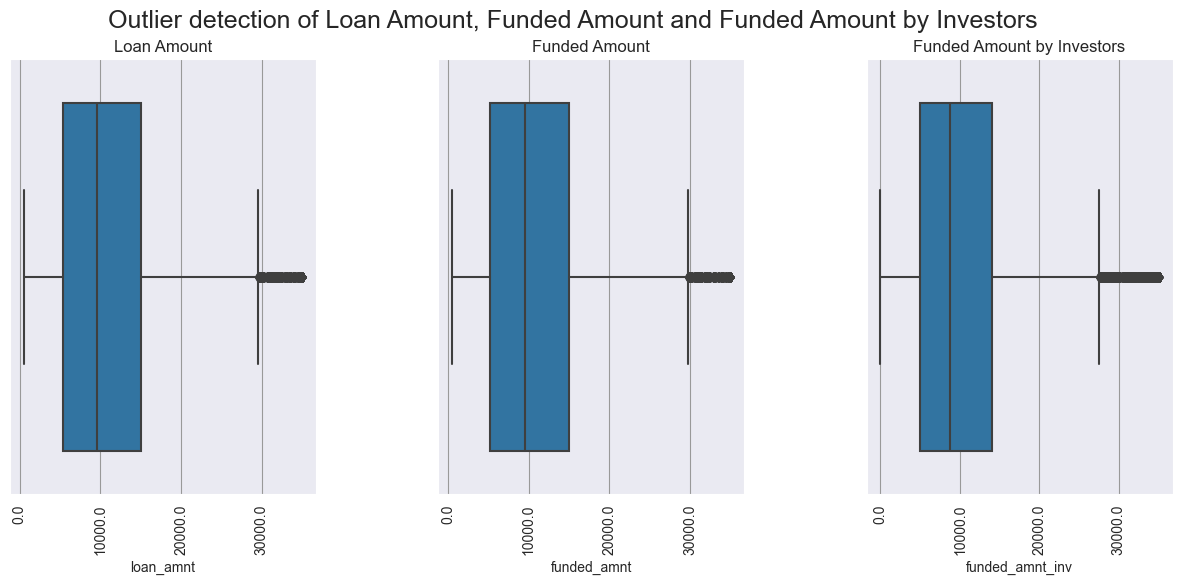

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
plt.subplots_adjust(bottom=0.01, hspace=0.9, wspace=0.4) #top = 0.99, 
fig.suptitle('Outlier detection of Loan Amount, Funded Amount and Funded Amount by Investors', fontsize=18)
sns.set_style("darkgrid", {"grid.color": ".6"})

# loan_amnt
sns.boxplot(ax=axes[0], data=loan_main, x="loan_amnt")
axes[0].set_title("Loan Amount")
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 90)

#funded_amnt
sns.boxplot(ax=axes[1], data=loan_main, x="funded_amnt")
axes[1].set_title("Funded Amount")
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 90)

#funded_amnt_inv
sns.boxplot(ax=axes[2], data=loan_main, x="funded_amnt_inv")
axes[2].set_title("Funded Amount by Investors")
axes[2].set_xticklabels(axes[2].get_xticks(), rotation = 90)

plt.show()

### Observation - all three have continuous values in distribution, so let's not drop anything..
---

#### int_rate

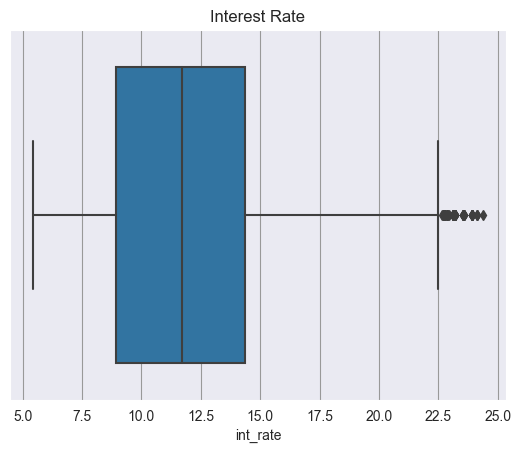

In [84]:
# int_rate
sns.boxplot(data=loan_main, x="int_rate")
plt.title("Interest Rate")
plt.show()

### Observation - int_rate column has a continuous distribution, so let's not drop anything..
-----------------

#### installment

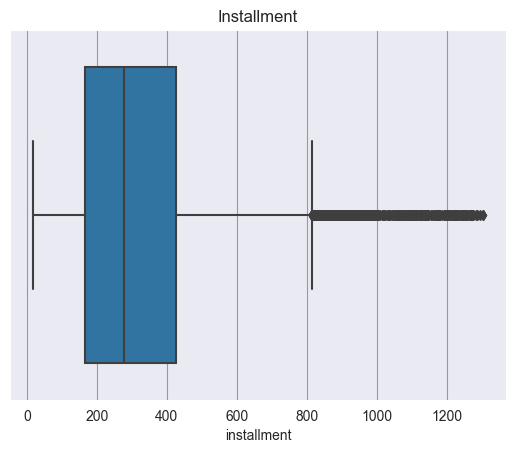

In [86]:
# installment
sns.boxplot(data=loan_main, x="installment")
plt.title("Installment")
plt.show()

### Observation - installment column has a continuous distribution, so let's not drop anything..
------------------------

#### annual_inc

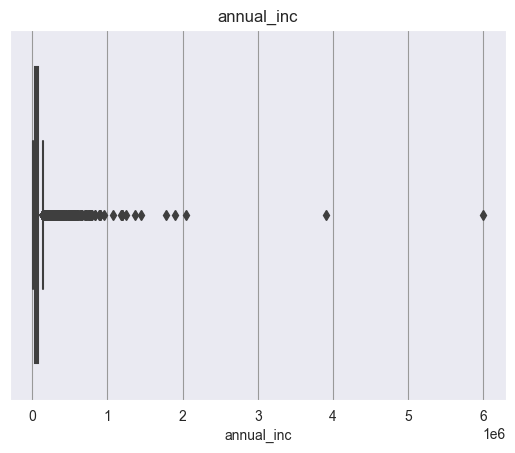

In [87]:
# annual_inc
sns.boxplot(data=loan_main, x="annual_inc")
plt.title("annual_inc")
plt.show()

### Observation - here we need to drop outliers, because distribution is not continous..

In [98]:
print("Before dropping anything from annual_inc column -")
print(loan_main["annual_inc"].describe(), "\n")
print("various quantile values [25%, 50%, 75%, 90%, 95% and 100%] ->", np.quantile(loan_main["annual_inc"], [0.25, 0.5, 0.75, 0.9, 0.95, 1]))
print("Let's drop all the rows having annual income greater than 95%")
loan_main = loan_main[loan_main["annual_inc"] < np.quantile(loan_main["annual_inc"], 0.95)]
print("\nAfter dropping everything greater than 95 percentile from annual_inc column -")
print(loan_main["annual_inc"].describe())

Before dropping anything from annual_inc column -
count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64 

various quantile values [25%, 50%, 75%, 90%, 95% and 100%] -> [  40000.   58868.   82000.  115000.  140004. 6000000.]
Let's drop all the rows having annual income greater than 95%

After dropping everything greater than 95 percentile from annual_inc column -
count     36642.000000
mean      60829.831120
std       27717.831464
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77704.050000
max      140000.000000
Name: annual_inc, dtype: float64


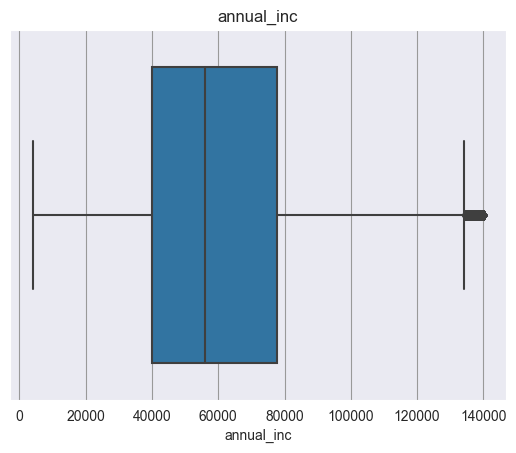

In [101]:
# Again displaying annual_inc after dropping all the outliers
sns.boxplot(data=loan_main, x="annual_inc")
plt.title("annual_inc")
plt.show()

### Observation - now, it's correct, the distribution of annual income is continous..
---

#### dti (debt to income ratio)

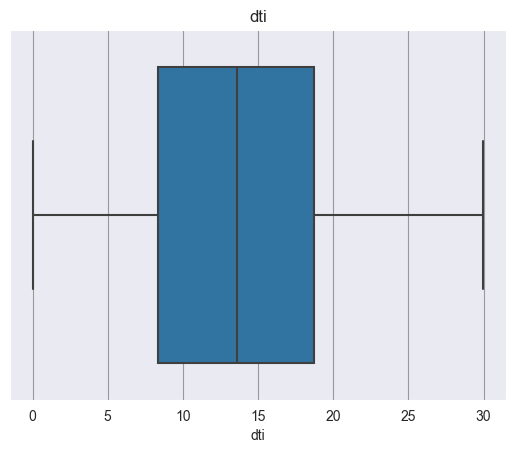

In [100]:
# dti
sns.boxplot(data=loan_main, x="dti")
plt.title("dti")
plt.show()

### Observation - there is no outlier.. hence nothing to drop
-------------

## Now, we have completed data processing ...
### Let's analyse 

In [128]:
# Let's store the dataframe in another.. as we would be doing binning and all on this new dataframe
loan_main_final = loan_main

#Print shapes of dataframes to verify
print("Shape of loan_main dataframe -", loan_main.shape)
print("Shape of loan_main_final dataframe -", loan_main_final.shape)
print("Above both shapes must be equal!!")
print("Shape of loan_charged -", loan_charged.shape)

Shape of loan_main dataframe - (36642, 19)
Shape of loan_main_final dataframe - (36642, 19)
Above both shapes must be equal!!
Shape of loan_charged - (5416, 19)


# F. Univariate Analysis

In [129]:
# function to display values in various plots
def plot_annotation(splot):
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### Loan Amount, Funded Amount and Funded Amount by Investors

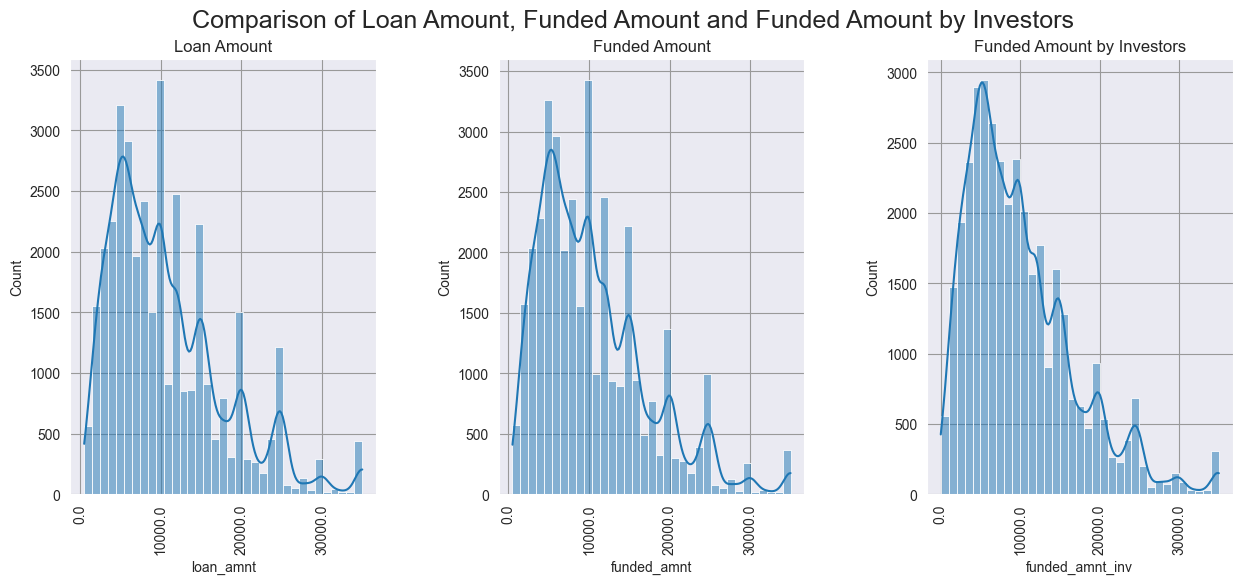

In [130]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.subplots_adjust(bottom=0.01, hspace=0.9, wspace=0.4) #top = 0.99, 
fig.suptitle('Comparison of Loan Amount, Funded Amount and Funded Amount by Investors', fontsize=18)
sns.set_style("darkgrid", {"grid.color": ".6"})
# loan_amnt
sns.histplot(ax=axes[0], data=loan_main_final, x="loan_amnt", bins=35, kde=True)
axes[0].set_title("Loan Amount")
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 90)

#funded_amnt
sns.histplot(ax=axes[1], data=loan_main_final, x="funded_amnt", bins=35, kde=True)
axes[1].set_title("Funded Amount")
axes[1].set_xticklabels(axes[1].get_xticks(), rotation = 90)

#funded_amnt_inv
sns.histplot(ax=axes[2], data=loan_main_final, x="funded_amnt_inv", bins=35, kde=True)
axes[2].set_title("Funded Amount by Investors")
axes[2].set_xticklabels(axes[2].get_xticks(), rotation = 90)
plt.show()

### Observation - 
<b> 1. All three amounts are following same pattern, with slight changes in values in funded_amnt_inv </b>
<br>
<b> 2. Maximum number of loans are in range 5k to 10k </b>
--------------------------------------------------------------------------------------------------------------

#### Term for Loan

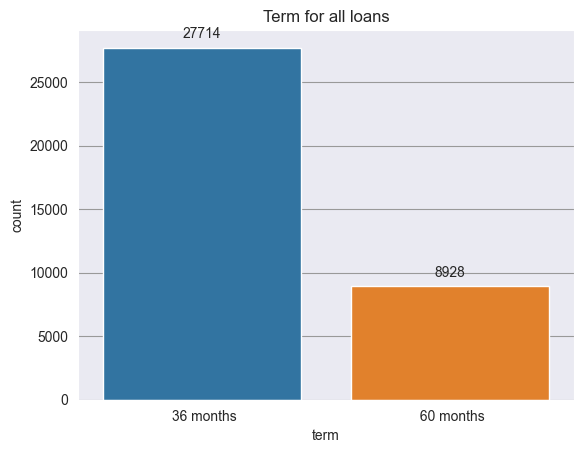

In [131]:
# term for whole dataset
splot1 = sns.countplot(data=loan_main_final, x="term")
plot_annotation(splot1)
plt.title("Term for all loans")

plt.show()

### Observation - 
<b> 1. Maximum loans are for period of 36 months </b>
<br> 
--------------------------------------------------------------------------------------------------------------

#### Grade and subgrade assigned to loan
Loans graded A have the lowest expected risk of loss and therefore pay the lender the lowest interest rate. On the other hand, G loans have the highest expected risk of loss. Accordingly, G loans pay the highest interest rate in order to compensate lenders for the increased risk relative to an A loan.
<br>
Subgrade 1 to 5 is also going from lowest to highest risk of loss

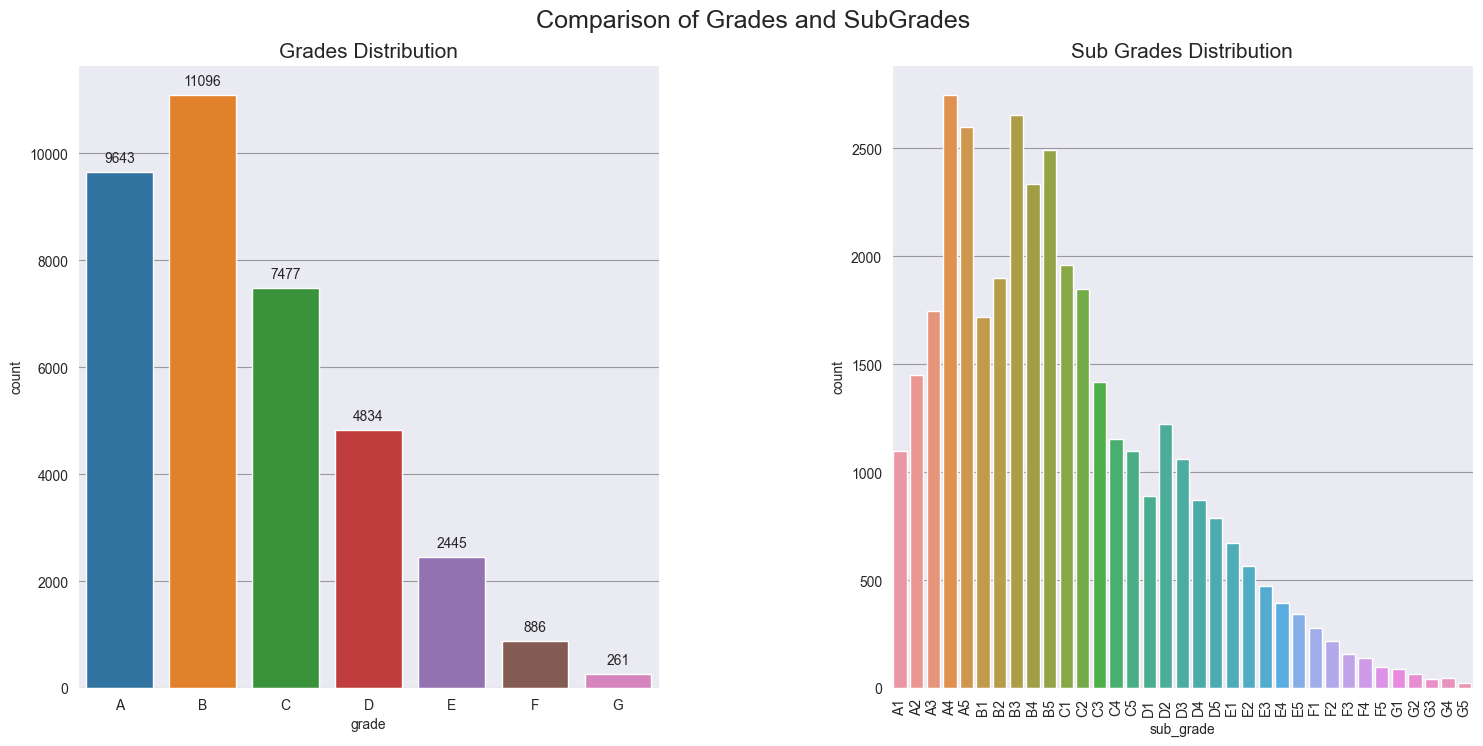

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
plt.subplots_adjust(top=0.9, bottom=0.01, hspace=0.4, wspace=0.4)
fig.suptitle('Comparison of Grades and SubGrades', fontsize=18)

# for whole dataset
# grades
splot = sns.countplot(ax=axes[0], x="grade", data=loan_main_final, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plot_annotation(splot)
axes[0].set_title("Grades Distribution", fontsize=15)
# sub grades
sub_grade_order = [g+str(subg) for g in ['A','B','C','D','E','F','G'] for subg in [1,2,3,4,5]]
sns.countplot(ax=axes[1], x="sub_grade", data=loan_main_final, order=sub_grade_order)
axes[1].set_xticklabels(labels=sub_grade_order, rotation = 90)
axes[1].set_title("Sub Grades Distribution", fontsize=15)

plt.show()

### Observation - 
<b> 1.  Maximum count is for grade B (subgrade B1 to B5) and </b>
<br>
<b> 2.  lowest is for grade G (subgrade G1 to G5) </b>
--------------------------------------------------------------------------------------------------------------

#### Employment Tenure 

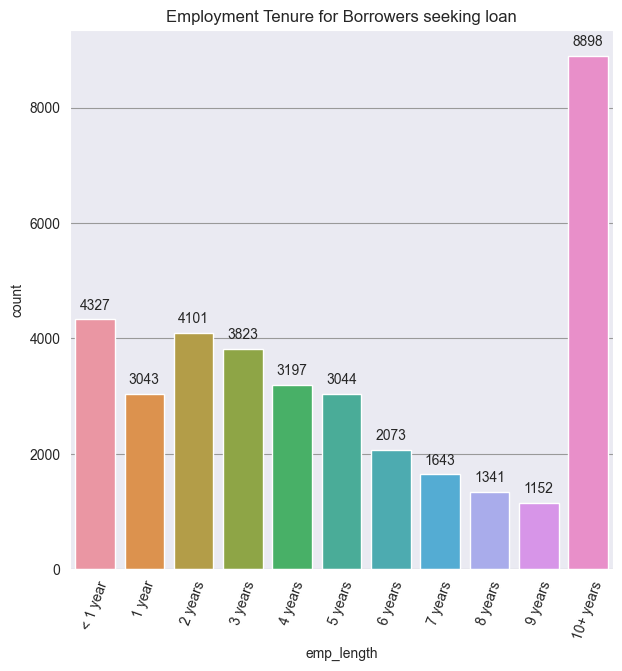

In [133]:
plt.figure(figsize=[7,7])
emp_len_order = ["< 1 year", "1 year"] + [num + " years" for num in ['2','3','4','5','6','7','8','9','10+']]
splot = sns.countplot(x="emp_length", data=loan_main_final, order=emp_len_order)
plot_annotation(splot)
plt.title("Employment Tenure for Borrowers seeking loan")
plt.xticks(rotation=70)
plt.show()

### Observation - 
<b> 1. Maximum employees have 10 or 10+ years of experience </b>
<br>
<b> 2. Least having 9 years of experience </b>
------------------------------------------------------------------------------------------------------------

#### Home ownership

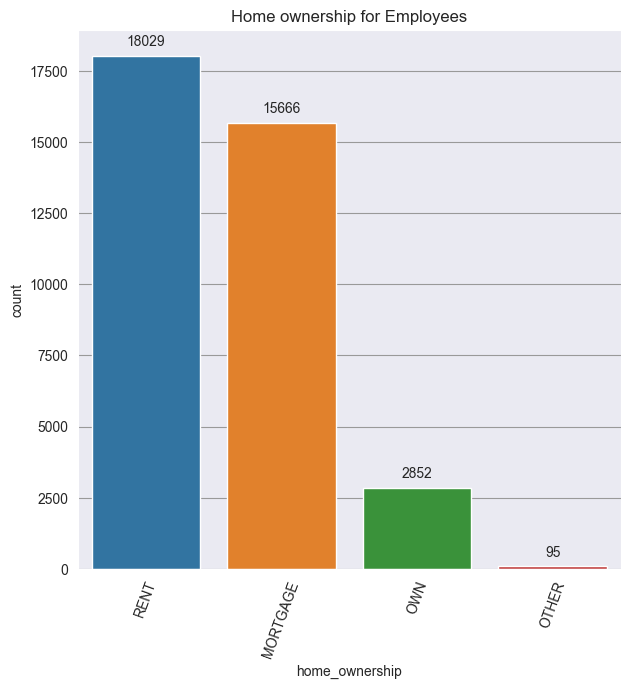

In [134]:
plt.figure(figsize=[7,7])
splot = sns.countplot(x="home_ownership", data=loan_main_final, order=list(loan_main["home_ownership"].value_counts().index))
plot_annotation(splot)
plt.title("Home ownership for Employees")
plt.xticks(rotation=70)
plt.show()

### Observation - Maximum borrowers have either living in rented home or mortgaged their property
-------------------------------------------------------------------------

#### Verification Status

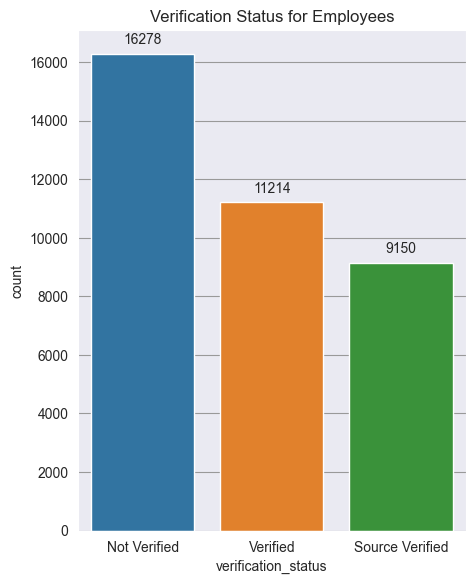

In [135]:
# verification_status
plt.figure(figsize=[5,6.5])
splot = sns.countplot(x="verification_status", data=loan_main_final, order=list(loan_main["verification_status"].value_counts().index))
plot_annotation(splot)
plt.title("Verification Status for Employees")
plt.show()

### Observation - 
<b> 1. income sources of employees are least verified and </b>
<br>
<b> 2. employees with incomes not verified are maximum </b>
---------------------------------------------

#### Loan Status

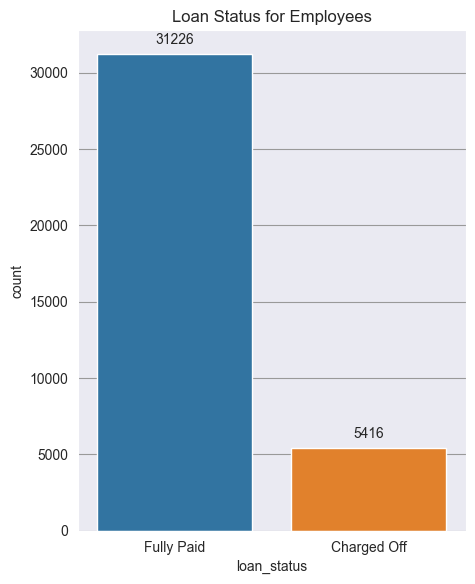

In [136]:
# loan_status
plt.figure(figsize=[5,6.5])
splot = sns.countplot(x="loan_status", data=loan_main_final)
plot_annotation(splot)
plt.title("Loan Status for Employees")
plt.show()

### Observation - Maximum employees have paid their loans fully
----------------------------

#### Purpose provided by borrowers

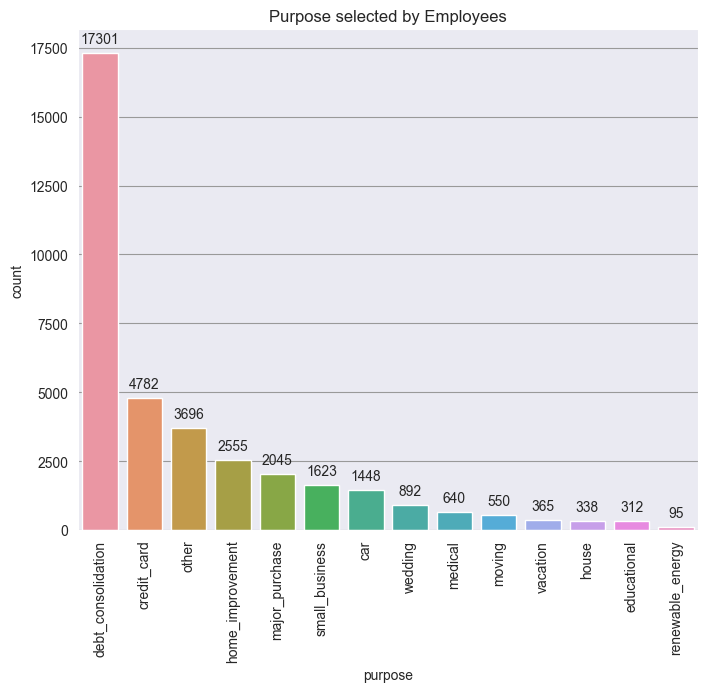

In [137]:
plt.figure(figsize=[8,6.5])
purp_order = list(loan_main["purpose"].value_counts().index)
splot = sns.countplot(x="purpose", data=loan_main_final, order=purp_order)
plot_annotation(splot)
plt.title("Purpose selected by Employees")
plt.xticks(rotation=90)
plt.show()

### Observation - 
<b> 1. Maximum people have taken loan for debt consolidation and credit card., </b>
<br>
<b> 2. least for renewable energy </b>
------------------

#### Address state given by Employees

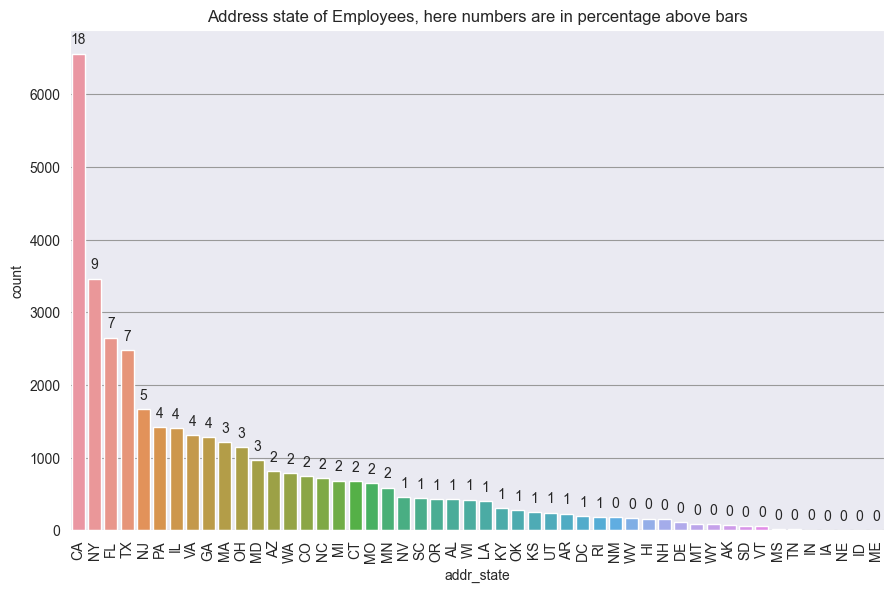

In [138]:
plt.figure(figsize=[10.5, 6.5])
splot = sns.countplot(x="addr_state", data=loan_main,
                      order=list(loan_main["addr_state"].value_counts().index))
for p in splot.patches:
    splot.annotate(format(p.get_height()*100/loan_main.shape[0], '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Address state of Employees, here numbers are in percentage above bars")
plt.xticks(rotation=90)
plt.show()

### Observation - Maximum people (18% of total) are from CA
---------------

#### Public record bankruptcies

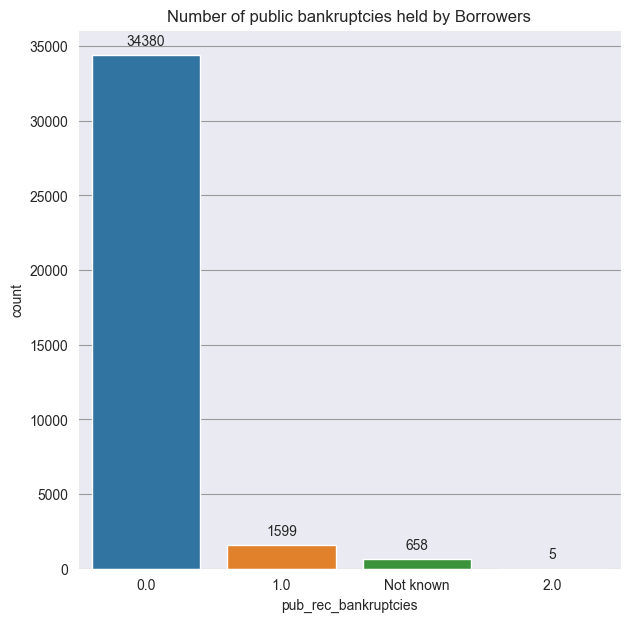

In [139]:
plt.figure(figsize=[7, 7])
splot = sns.countplot(x="pub_rec_bankruptcies", data=loan_main_final, order=list(loan_main["pub_rec_bankruptcies"].value_counts().index))
plot_annotation(splot)
plt.title("Number of public bankruptcies held by Borrowers")
# plt.xticks(rotation=90)
plt.show()

### Observation - Maximum borrowers have 0 record of bankruptcy
----

# G. Bivariate Analysis

In [140]:
loan_main_final.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0.0,Dec,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0.0,Dec,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0.0,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0.0,Dec,2011
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0.0,Dec,2011


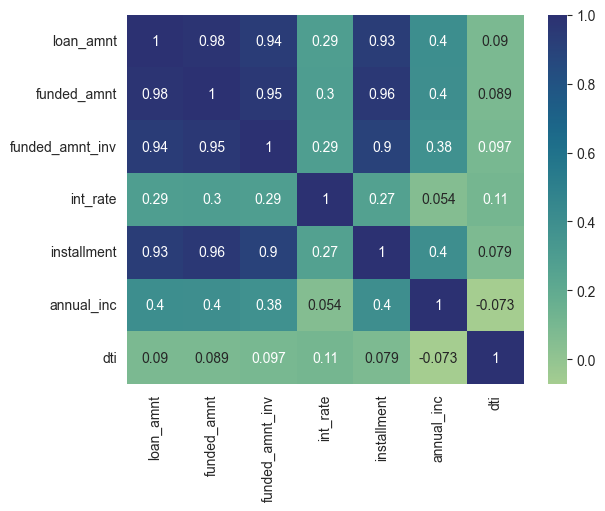

In [141]:
# correlation
corr_df = loan_main_final.corr()
# let's plot heatmap for this correlation df
sns.heatmap(corr_df, annot=True, cmap="crest")
plt.show()

### Observation - 
<b> 1. loan_amnt, funded_amnt, funded_amnt_inv, installment are highly correlated with each other in positive direction </b>
<br>
<b> 2. dti column is not correlated to any other column </b>
---

### Let's create bucket of loan_amnt, int_rate, installment, annual_inc and dti for bivariate analysis with loan_status

In [174]:
# for last limit in each column, check df[col].describe() and check max value.

# creating categories for loan_amnt
loan_main_final['loan_amnt_categs'] = pd.cut(loan_main_final['loan_amnt'], [0,5000,10000,15000,20000,25000, 30000, 35000],
                                             labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', 
                                                   '25000-30000', '30000+'])

# creating categories for int_rate.. common interest rate is 12.5 that's why splitting in between
loan_main_final['int_rate_categs'] = pd.cut(loan_main_final['int_rate'], [0, 10, 12.5, 16, 24.4],
                                            labels=['0-10','10-12.5','12.5-16','16+'])

# creating categories for installment
loan_main_final["installment_categs"] = pd.cut(loan_main_final['installment'], [0, 100, 200, 300, 400, 500, 1400], 
                                              labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500+'])

# creating categories for annual_inc
loan_main_final["annual_inc_categs"] = pd.cut(loan_main_final['annual_inc'], [0, 30000, 50000, 70000, 140000],
                                       labels=['0-30000', '30000-50000', '50000-70000', '70000+'])

# creating categories for dti
loan_main_final["dti_categs"] = pd.cut(loan_main_final['dti'], [0, 5, 10, 15, 20, 25, 30],
                                       labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25+'])

# drop extra columns and put only categorical columns in loan_main_categs
loan_main_categs = loan_main_final.drop(["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", 
                                         "installment", "annual_inc", "dti"], axis=1)

In [175]:
loan_main_categs.head(5)

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_categs,int_rate_categs,installment_categs,annual_inc_categs,dti_categs
0,36 months,B,B2,10+ years,RENT,Verified,Fully Paid,credit_card,AZ,0.0,Dec,2011,0-5000,10-12.5,100-200,0-30000,25+
1,60 months,C,C4,< 1 year,RENT,Source Verified,Charged Off,car,GA,0.0,Dec,2011,0-5000,12.5-16,0-100,0-30000,0-5
2,36 months,C,C5,10+ years,RENT,Not Verified,Fully Paid,small_business,IL,0.0,Dec,2011,0-5000,12.5-16,0-100,0-30000,5-10
3,36 months,C,C1,10+ years,RENT,Source Verified,Fully Paid,other,CA,0.0,Dec,2011,5000-10000,12.5-16,300-400,30000-50000,15-20
4,36 months,A,A4,3 years,RENT,Source Verified,Fully Paid,wedding,AZ,0.0,Dec,2011,0-5000,0-10,100-200,30000-50000,10-15


### term vs loan_status

In [180]:
term_status = loan_main_categs.groupby(["term", "loan_status"]).loan_status.count()
term_status = term_status.unstack().reset_index()

term_status["Total"] = term_status["Charged Off"] + term_status["Fully Paid"]
term_status["chargedOff_percent"] = term_status["Charged Off"] * 100 / term_status["Total"]

term_status

loan_status,term,Charged Off,Fully Paid,Total,chargedOff_percent
0,36 months,3113,24601,27714,11.232590
1,60 months,2303,6625,8928,25.795251


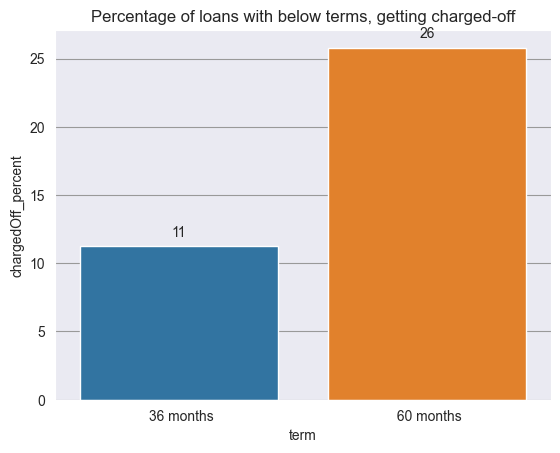

In [181]:
splot = sns.barplot(x=term_status["term"], y=term_status["chargedOff_percent"])
plot_annotation(splot)
plt.title("Percentage of loans with below terms, getting charged-off")
plt.show()

### Observation - loans with term period of 60 months have 26% chances of getting charged-off
---

###  loan_amnt_categs vs loan_status

In [178]:
loan_amnt_status = loan_main_categs.groupby(["loan_amnt_categs", "loan_status"]).loan_status.count()
loan_amnt_status = loan_amnt_status.unstack().reset_index()

loan_amnt_status["Total"] = loan_amnt_status["Charged Off"] + loan_amnt_status["Fully Paid"]
loan_amnt_status["chargedOff_percent"] = loan_amnt_status["Charged Off"] * 100 / loan_amnt_status["Total"]

loan_amnt_status

loan_status,loan_amnt_categs,Charged Off,Fully Paid,Total,chargedOff_percent
0,0-5000,1299,8019,9318,13.940760
1,5000-10000,1606,10814,12420,12.930757
2,10000-15000,1027,6299,7326,14.018564
3,15000-20000,722,3329,4051,17.822760
4,20000-25000,485,1926,2411,20.116134
5,25000-30000,123,454,577,21.317158
6,30000+,154,385,539,28.571429


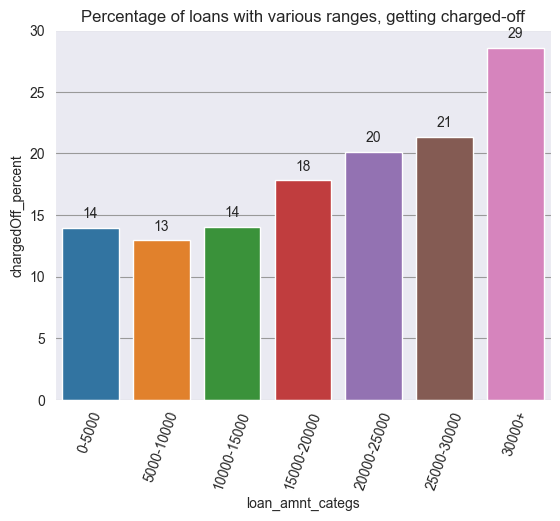

In [179]:
splot = sns.barplot(x=loan_amnt_status["loan_amnt_categs"], y=loan_amnt_status["chargedOff_percent"])
plot_annotation(splot)
plt.title("Percentage of loans with various ranges, getting charged-off")
plt.xticks(rotation=70)
plt.show()

### Observation - Higher the loan, higher the chances of getting charged off
---

### grade vs loan_status

In [183]:
# grade 
grade_status = loan_main_categs.groupby(["grade", "loan_status"]).loan_status.count()
grade_status = grade_status.unstack().reset_index()

grade_status["Total"] = grade_status["Charged Off"] + grade_status["Fully Paid"]
grade_status["chargedOff_percent"] = grade_status["Charged Off"] * 100 / grade_status["Total"]

grade_status

loan_status,grade,Charged Off,Fully Paid,Total,chargedOff_percent
0,A,593,9050,9643,6.149539
1,B,1376,9720,11096,12.400865
2,C,1324,6153,7477,17.707637
3,D,1080,3754,4834,22.341746
4,E,659,1786,2445,26.952965
5,F,289,597,886,32.618510
6,G,95,166,261,36.398467


In [185]:
# sub_grade
sub_grade_status = loan_main_categs.groupby(["sub_grade", "loan_status"]).loan_status.count()
sub_grade_status = sub_grade_status.unstack().reset_index()

sub_grade_status["Total"] = sub_grade_status["Charged Off"] + sub_grade_status["Fully Paid"]
sub_grade_status["chargedOff_percent"] = sub_grade_status["Charged Off"] * 100 / sub_grade_status["Total"]

sub_grade_status

loan_status,sub_grade,Charged Off,Fully Paid,Total,chargedOff_percent
0,A1,30,1067,1097,2.734731
1,A2,74,1377,1451,5.099931
2,A3,103,1645,1748,5.892449
3,A4,173,2575,2748,6.295488
4,A5,213,2386,2599,8.195460
5,B1,166,1552,1718,9.662398
6,B2,217,1682,1899,11.427067
7,B3,326,2328,2654,12.283346
8,B4,319,2014,2333,13.673382
9,B5,348,2144,2492,13.964687


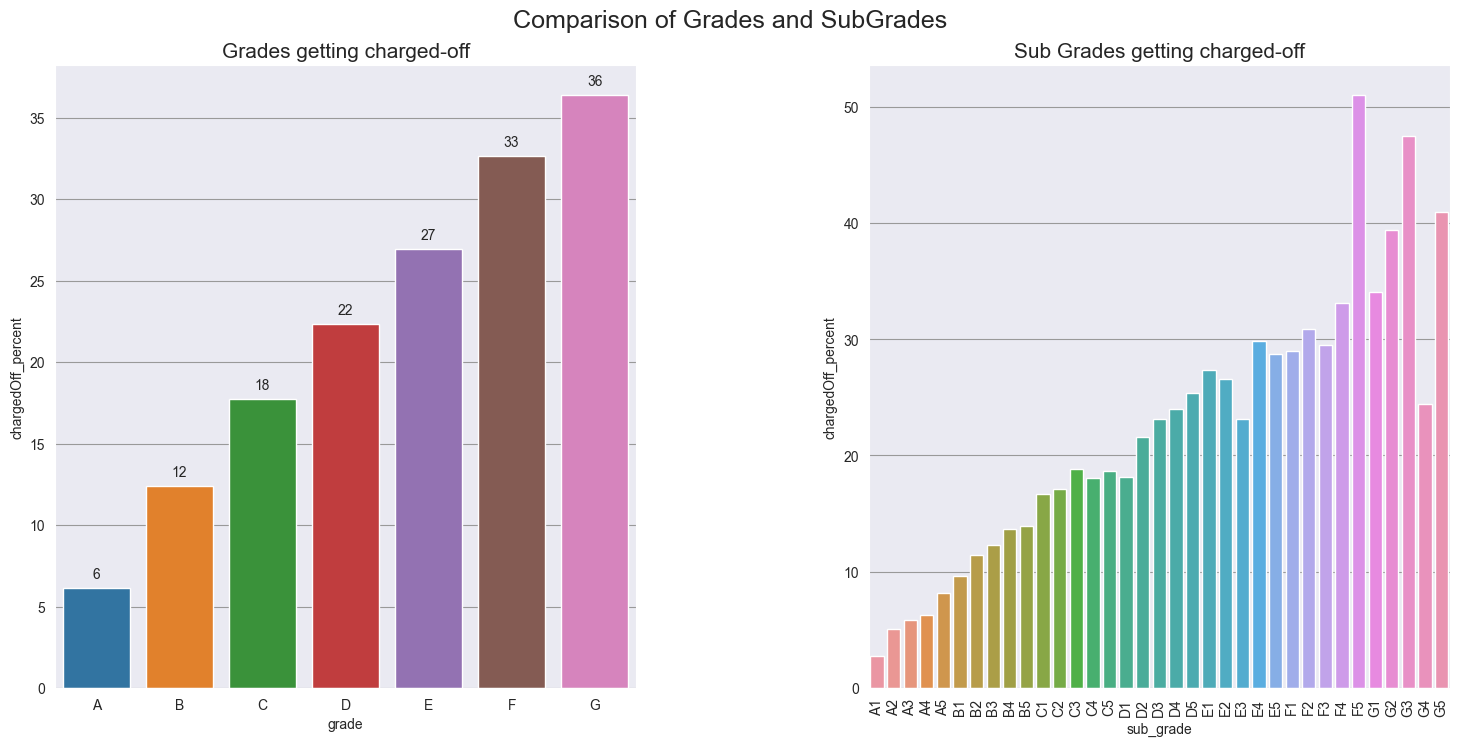

In [190]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
plt.subplots_adjust(top=0.9, bottom=0.01, hspace=0.4, wspace=0.4)
fig.suptitle('Comparison of Grades and SubGrades', fontsize=18)

# for whole dataset
# grades
splot = sns.barplot(ax=axes[0], x=grade_status["grade"], y=grade_status["chargedOff_percent"], 
                    order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plot_annotation(splot)
axes[0].set_title("Grades getting charged-off", fontsize=15)
# sub grades
sub_grade_order = [g+str(subg) for g in ['A','B','C','D','E','F','G'] for subg in [1,2,3,4,5]]
sns.barplot(ax=axes[1], x=sub_grade_status["sub_grade"], y=sub_grade_status["chargedOff_percent"], 
            data=loan_main_categs, order=sub_grade_order)
axes[1].set_xticklabels(labels=sub_grade_order, rotation = 90)
axes[1].set_title("Sub Grades getting charged-off", fontsize=15)

plt.show()

### Observation - 
<b> 1. As grade is moving from A to G, risk is increasing and hence percentage of getting charged-off is also increasing..</b>
<br>
<b> 2. Same for subgrade also, small fluctuations within grade, </b>
<br>
<b> 3. But overall loan with G and F category and subgrade with F1 to G5 categories have maximum chances of getting charged-off </b>
---

### emp_length vs loan_status

In [192]:
emp_length_status = loan_main_categs.groupby(["emp_length", "loan_status"]).loan_status.count()
emp_length_status = emp_length_status.unstack().reset_index()

emp_length_status["Total"] = emp_length_status["Charged Off"] + emp_length_status["Fully Paid"]
emp_length_status["chargedOff_percent"] = emp_length_status["Charged Off"] * 100 / emp_length_status["Total"]

emp_length_status

loan_status,emp_length,Charged Off,Fully Paid,Total,chargedOff_percent
0,1 year,449,2594,3043,14.755176
1,10+ years,1494,7404,8898,16.790290
2,2 years,547,3554,4101,13.338210
3,3 years,536,3287,3823,14.020403
4,4 years,443,2754,3197,13.856741
5,5 years,441,2603,3044,14.487516
6,6 years,294,1779,2073,14.182344
7,7 years,252,1391,1643,15.337797
8,8 years,194,1147,1341,14.466816
9,9 years,149,1003,1152,12.934028


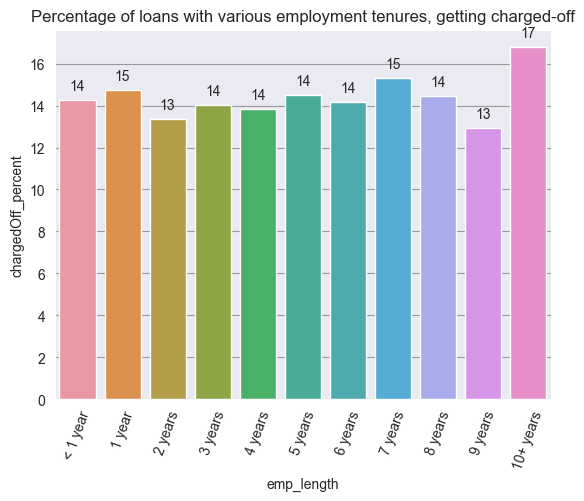

In [194]:
splot = sns.barplot(x=emp_length_status["emp_length"], y=emp_length_status["chargedOff_percent"], 
                    order=["< 1 year", "1 year", "2 years", "3 years", "4 years", "5 years", 
                           "6 years", "7 years", "8 years", "9 years", "10+ years"])
plot_annotation(splot)
plt.title("Percentage of loans with various employment tenures, getting charged-off")
plt.xticks(rotation=70)
plt.show()

### Observation - there is no major change in charged-off status with respect to employment tenure
---

### Home ownership vs loan status

In [195]:
home_ownership_status = loan_main_categs.groupby(["home_ownership", "loan_status"]).loan_status.count()
home_ownership_status = home_ownership_status.unstack().reset_index()

home_ownership_status["Total"] = home_ownership_status["Charged Off"] + home_ownership_status["Fully Paid"]
home_ownership_status["chargedOff_percent"] = home_ownership_status["Charged Off"] * 100 / home_ownership_status["Total"]

home_ownership_status

loan_status,home_ownership,Charged Off,Fully Paid,Total,chargedOff_percent
0,MORTGAGE,2192,13474,15666,13.992085
1,OTHER,17,78,95,17.894737
2,OWN,434,2418,2852,15.217391
3,RENT,2773,15256,18029,15.380775


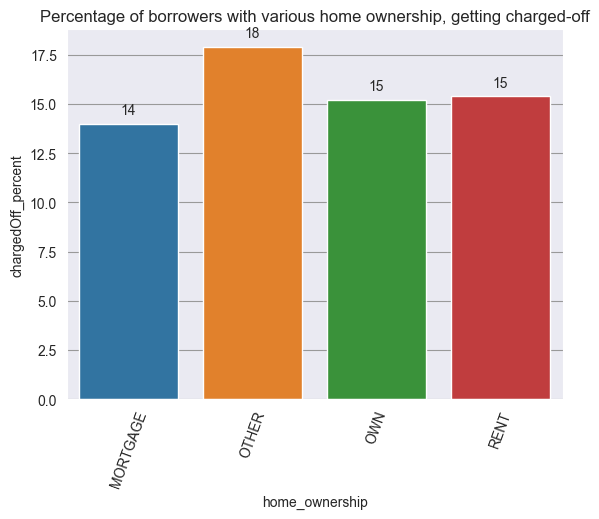

In [196]:
splot = sns.barplot(x=home_ownership_status["home_ownership"], y=home_ownership_status["chargedOff_percent"])
                    
plot_annotation(splot)
plt.title("Percentage of borrowers with various home ownership, getting charged-off")
plt.xticks(rotation=70)
plt.show()

### Observation - there is no major change in charged-off status with respect to home ownership
---

### verification status vs loan status

In [197]:
verification_loan_status = loan_main_categs.groupby(["verification_status", "loan_status"]).loan_status.count()
verification_loan_status = verification_loan_status.unstack().reset_index()

verification_loan_status["Total"] = verification_loan_status["Charged Off"] + verification_loan_status["Fully Paid"]
verification_loan_status["chargedOff_percent"] = verification_loan_status["Charged Off"] * 100 / verification_loan_status["Total"]

verification_loan_status

loan_status,verification_status,Charged Off,Fully Paid,Total,chargedOff_percent
0,Not Verified,2095,14183,16278,12.870131
1,Source Verified,1373,7777,9150,15.005464
2,Verified,1948,9266,11214,17.371143


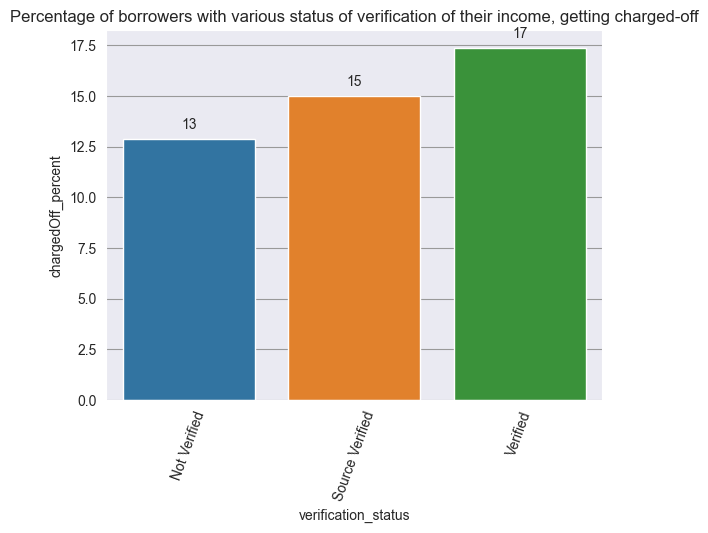

In [198]:
splot = sns.barplot(x=verification_loan_status["verification_status"], y=verification_loan_status["chargedOff_percent"])
                    
plot_annotation(splot)
plt.title("Percentage of borrowers with various status of verification of their income, getting charged-off")
plt.xticks(rotation=70)
plt.show()

### Observation - from above results, it's wierd but employees with incomes verified are more in percentage having loan status as charged-off
---

### purpose vs loan status

In [199]:
purpose_status = loan_main_categs.groupby(["purpose", "loan_status"]).loan_status.count()
purpose_status = purpose_status.unstack().reset_index()

purpose_status["Total"] = purpose_status["Charged Off"] + purpose_status["Fully Paid"]
purpose_status["chargedOff_percent"] = purpose_status["Charged Off"] * 100 / purpose_status["Total"]

purpose_status

loan_status,purpose,Charged Off,Fully Paid,Total,chargedOff_percent
0,car,159,1289,1448,10.980663
1,credit_card,519,4263,4782,10.853199
2,debt_consolidation,2675,14626,17301,15.461534
3,educational,54,258,312,17.307692
4,home_improvement,322,2233,2555,12.602740
5,house,55,283,338,16.272189
6,major_purchase,217,1828,2045,10.611247
7,medical,104,536,640,16.250000
8,moving,90,460,550,16.363636
9,other,605,3091,3696,16.369048


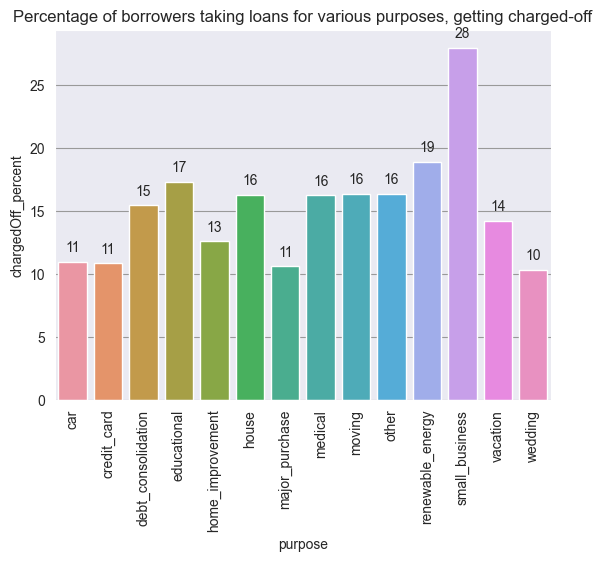

In [201]:
splot = sns.barplot(x=purpose_status["purpose"], y=purpose_status["chargedOff_percent"])
                    
plot_annotation(splot)
plt.title("Percentage of borrowers taking loans for various purposes, getting charged-off")
plt.xticks(rotation=90)
plt.show()

### Observation - Maximum loans taken for small business, got charged-off, and then for renewable energy
---

In [202]:
state_status = loan_main_categs.groupby(["addr_state", "loan_status"]).loan_status.count()
state_status = state_status.unstack().reset_index()

state_status["Total"] = state_status["Charged Off"] + state_status["Fully Paid"]
state_status["chargedOff_percent"] = state_status["Charged Off"] * 100 / state_status["Total"]

state_status

loan_status,addr_state,Charged Off,Fully Paid,Total,chargedOff_percent
0,AK,13.0,58.0,71.0,18.309859
1,AL,52.0,371.0,423.0,12.293144
2,AR,26.0,203.0,229.0,11.353712
3,AZ,117.0,693.0,810.0,14.444444
4,CA,1073.0,5487.0,6560.0,16.356707
5,CO,96.0,645.0,741.0,12.955466
6,CT,90.0,581.0,671.0,13.412817
7,DC,13.0,182.0,195.0,6.666667
8,DE,12.0,97.0,109.0,11.009174
9,FL,485.0,2167.0,2652.0,18.288084


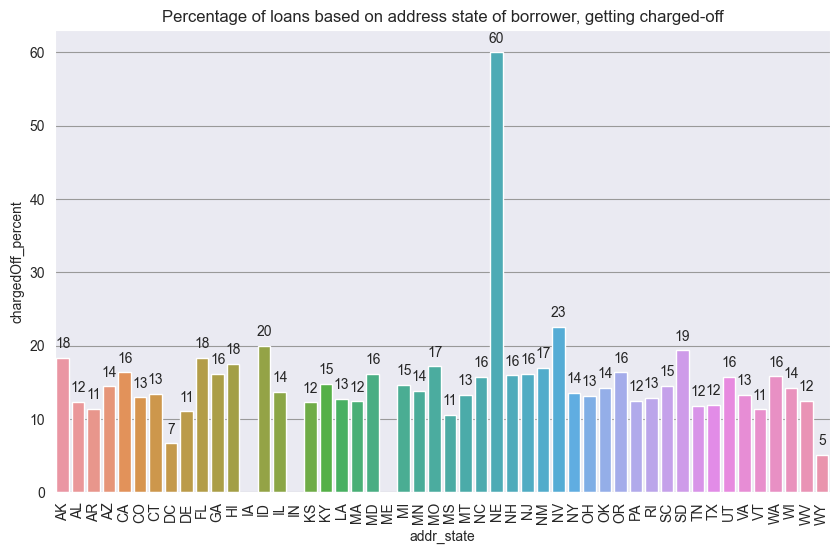

In [207]:
plt.figure(figsize=[10,6])
splot = sns.barplot(x=state_status["addr_state"], y=state_status["chargedOff_percent"])
                    
plot_annotation(splot)
plt.title("Percentage of loans based on address state of borrower, getting charged-off")
plt.xticks(rotation=90)
plt.show()

### Observation - maximum percentage of loans taken by borrowers from state "NE", got charged off
---

### public record bankruptcies and loan status

In [208]:
bankrupt_status = loan_main_categs.groupby(["pub_rec_bankruptcies", "loan_status"]).loan_status.count()
bankrupt_status = bankrupt_status.unstack().reset_index()

bankrupt_status["Total"] = bankrupt_status["Charged Off"] + bankrupt_status["Fully Paid"]
bankrupt_status["chargedOff_percent"] = bankrupt_status["Charged Off"] * 100 / bankrupt_status["Total"]

bankrupt_status

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,chargedOff_percent
0,0.0,4941,29439,34380,14.371728
1,1.0,361,1238,1599,22.576610
2,2.0,2,3,5,40.000000
3,Not known,112,546,658,17.021277


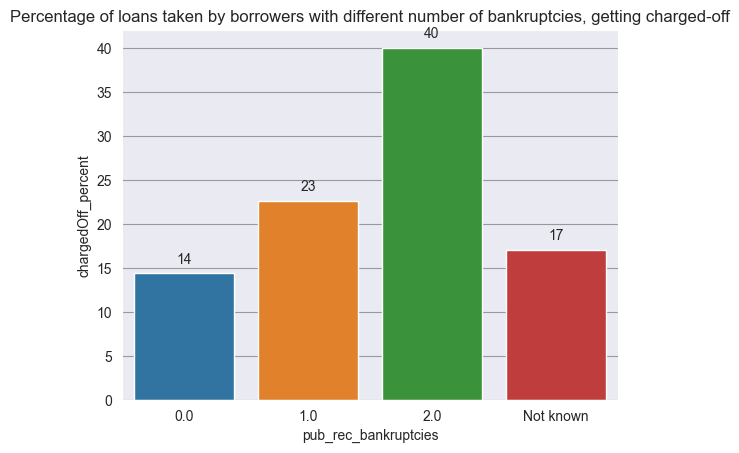

In [211]:
splot = sns.barplot(x=bankrupt_status["pub_rec_bankruptcies"], y=bankrupt_status["chargedOff_percent"])
                    
plot_annotation(splot)
plt.title("Percentage of loans taken by borrowers with different number of bankruptcies, getting charged-off")
plt.show()

### Observation - loans taken by borrowers with number of bankruptcies 1 and 2, are likely to get charged-off
---

### issue month of loan and loan status

In [212]:
month_status = loan_main_categs.groupby(["issue_month", "loan_status"]).loan_status.count()
month_status = month_status.unstack().reset_index()

month_status["Total"] = month_status["Charged Off"] + month_status["Fully Paid"]
month_status["chargedOff_percent"] = month_status["Charged Off"] * 100 / month_status["Total"]

month_status

loan_status,issue_month,Charged Off,Fully Paid,Total,chargedOff_percent
0,Apr,360,2352,2712,13.274336
1,Aug,450,2764,3214,14.001245
2,Dec,656,3363,4019,16.322468
3,Feb,282,1969,2251,12.527765
4,Jan,311,1956,2267,13.718571
5,Jul,456,2737,3193,14.281240
6,Jun,461,2547,3008,15.325798
7,Mar,329,2222,2551,12.896903
8,May,453,2335,2788,16.248207
9,Nov,580,3240,3820,15.183246


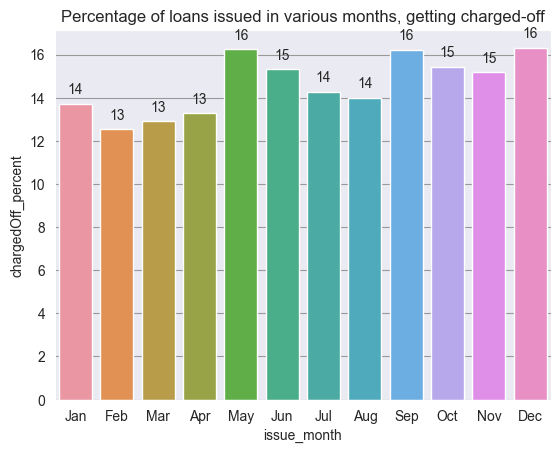

In [215]:
splot = sns.barplot(x=month_status["issue_month"], y=month_status["chargedOff_percent"], 
                    order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
                    
plot_annotation(splot)
plt.title("Percentage of loans issued in various months, getting charged-off")
plt.show()

### Observation - Maximum percentage of loans issued in May, Sep and Dec, got charged off
---

### issue year and loan status

In [216]:
year_status = loan_main_categs.groupby(["issue_year", "loan_status"]).loan_status.count()
year_status = year_status.unstack().reset_index()

year_status["Total"] = year_status["Charged Off"] + year_status["Fully Paid"]
year_status["chargedOff_percent"] = year_status["Charged Off"] * 100 / year_status["Total"]

year_status

loan_status,issue_year,Charged Off,Fully Paid,Total,chargedOff_percent
0,2007,41,189,230,17.826087
1,2008,237,1252,1489,15.916723
2,2009,567,3908,4475,12.670391
3,2010,1429,9578,11007,12.982647
4,2011,3142,16299,19441,16.161720


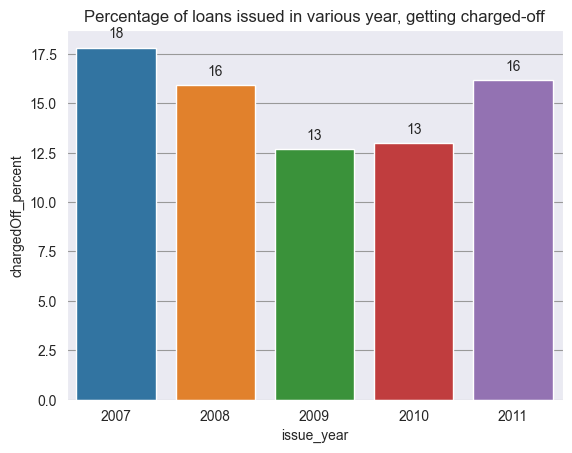

In [217]:
splot = sns.barplot(x=year_status["issue_year"], y=year_status["chargedOff_percent"])
                    
plot_annotation(splot)
plt.title("Percentage of loans issued in various year, getting charged-off")
plt.show()

### Observation - percentage of loans (issued in 2007, then in 2008 and 2011) with charged off status is maximum
---

### interest rate and loan status

In [218]:
int_rate_status = loan_main_categs.groupby(["int_rate_categs", "loan_status"]).loan_status.count()
int_rate_status = int_rate_status.unstack().reset_index()

int_rate_status["Total"] = int_rate_status["Charged Off"] + int_rate_status["Fully Paid"]
int_rate_status["chargedOff_percent"] = int_rate_status["Charged Off"] * 100 / int_rate_status["Total"]

int_rate_status

loan_status,int_rate_categs,Charged Off,Fully Paid,Total,chargedOff_percent
0,0-10,812,11009,11821,6.869131
1,10-12.5,1194,7709,8903,13.411210
2,12.5-16,1951,8974,10925,17.858124
3,16+,1459,3534,4993,29.220909


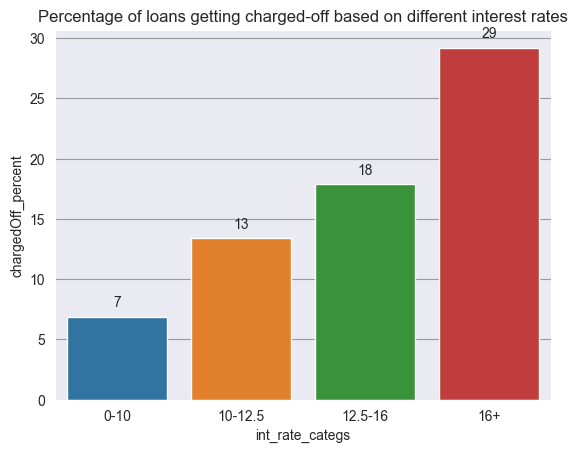

In [219]:
splot = sns.barplot(x=int_rate_status["int_rate_categs"], y=int_rate_status["chargedOff_percent"])
                    
plot_annotation(splot)
plt.title("Percentage of loans getting charged-off based on different interest rates")
plt.show()

### Observation - As interest rate is increasing, chances of loan getting charged off is also increasing
---

### installment and loan status

In [220]:
installment_status = loan_main_categs.groupby(["installment_categs", "loan_status"]).loan_status.count()
installment_status = installment_status.unstack().reset_index()

installment_status["Total"] = installment_status["Charged Off"] + installment_status["Fully Paid"]
installment_status["chargedOff_percent"] = installment_status["Charged Off"] * 100 / installment_status["Total"]

installment_status

loan_status,installment_categs,Charged Off,Fully Paid,Total,chargedOff_percent
0,0-100,595,3329,3924,15.163099
1,100-200,1196,7712,8908,13.426134
2,200-300,1049,6351,7400,14.175676
3,300-400,964,5845,6809,14.157732
4,400-500,586,3144,3730,15.710456
5,500+,1026,4845,5871,17.475728


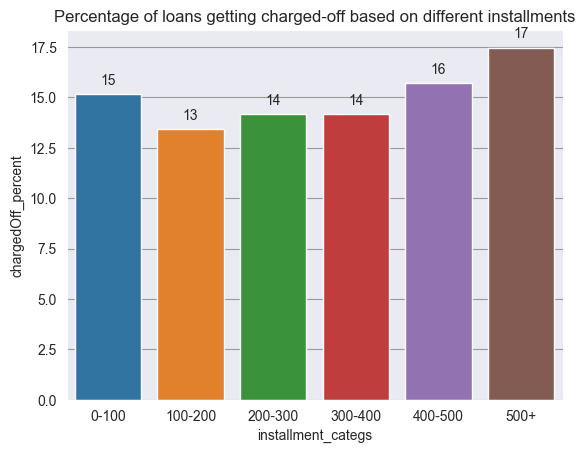

In [221]:
splot = sns.barplot(x=installment_status["installment_categs"], y=installment_status["chargedOff_percent"])
                    
plot_annotation(splot)
plt.title("Percentage of loans getting charged-off based on different installments")
plt.show()

### Observation - As installment amount is increasing, chances of loans getting charged off is also increasing
---

### annual income and loan status

In [222]:
annual_inc_status = loan_main_categs.groupby(["annual_inc_categs", "loan_status"]).loan_status.count()
annual_inc_status = annual_inc_status.unstack().reset_index()

annual_inc_status["Total"] = annual_inc_status["Charged Off"] + annual_inc_status["Fully Paid"]
annual_inc_status["chargedOff_percent"] = annual_inc_status["Charged Off"] * 100 / annual_inc_status["Total"]

annual_inc_status

loan_status,annual_inc_categs,Charged Off,Fully Paid,Total,chargedOff_percent
0,0-30000,839,3712,4551,18.435509
1,30000-50000,1774,9064,10838,16.368334
2,50000-70000,1426,8242,9668,14.749690
3,70000+,1377,10208,11585,11.886060


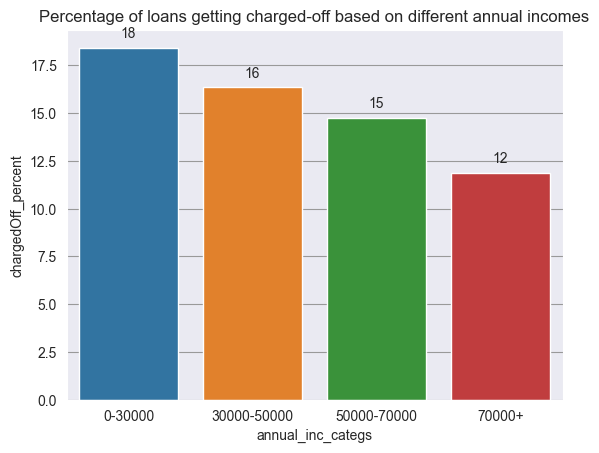

In [223]:
splot = sns.barplot(x=annual_inc_status["annual_inc_categs"], y=annual_inc_status["chargedOff_percent"])
                    
plot_annotation(splot)
plt.title("Percentage of loans getting charged-off based on different annual incomes")
plt.show()

### Observation - As annual income decreases, chances of loans getting charged off also increases
---

### dti and loan status

In [224]:
dti_status = loan_main_categs.groupby(["dti_categs", "loan_status"]).loan_status.count()
dti_status = dti_status.unstack().reset_index()

dti_status["Total"] = dti_status["Charged Off"] + dti_status["Fully Paid"]
dti_status["chargedOff_percent"] = dti_status["Charged Off"] * 100 / dti_status["Total"]

dti_status

loan_status,dti_categs,Charged Off,Fully Paid,Total,chargedOff_percent
0,0-5,561,3886,4447,12.615246
1,5-10,944,6320,7264,12.995595
2,10-15,1347,7818,9165,14.697218
3,15-20,1346,7178,8524,15.790709
4,20-25,1103,5355,6458,17.079591
5,25+,87,527,614,14.169381


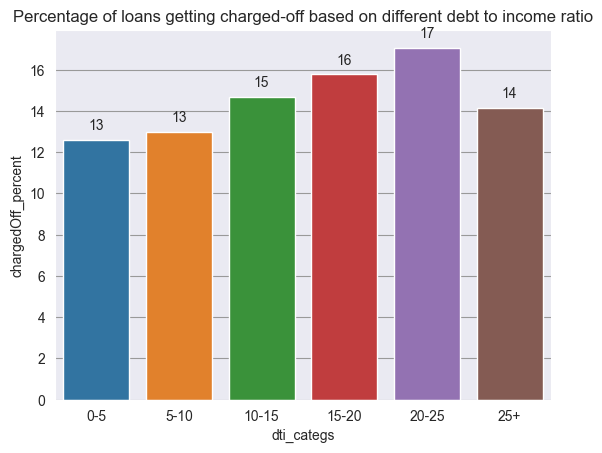

In [225]:
splot = sns.barplot(x=dti_status["dti_categs"], y=dti_status["chargedOff_percent"])
                    
plot_annotation(splot)
plt.title("Percentage of loans getting charged-off based on different debt to income ratio")
plt.show()

### Observation - as dti increases, chances of loans getting charged off also increases
---

In [226]:
# Let's display the dataframe for last time..
loan_main_categs.head(5)

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state,pub_rec_bankruptcies,issue_month,issue_year,loan_amnt_categs,int_rate_categs,installment_categs,annual_inc_categs,dti_categs
0,36 months,B,B2,10+ years,RENT,Verified,Fully Paid,credit_card,AZ,0.0,Dec,2011,0-5000,10-12.5,100-200,0-30000,25+
1,60 months,C,C4,< 1 year,RENT,Source Verified,Charged Off,car,GA,0.0,Dec,2011,0-5000,12.5-16,0-100,0-30000,0-5
2,36 months,C,C5,10+ years,RENT,Not Verified,Fully Paid,small_business,IL,0.0,Dec,2011,0-5000,12.5-16,0-100,0-30000,5-10
3,36 months,C,C1,10+ years,RENT,Source Verified,Fully Paid,other,CA,0.0,Dec,2011,5000-10000,12.5-16,300-400,30000-50000,15-20
4,36 months,A,A4,3 years,RENT,Source Verified,Fully Paid,wedding,AZ,0.0,Dec,2011,0-5000,0-10,100-200,30000-50000,10-15


# Recommendations (Driving variables)
### 1. Loan Amount - As loan amount increases, chances of loan getting charged off also rises
<b>30000+ amounts have 29% chances of gettting charged off </b> <br>
<b>25000-30000 range has 21% chances of getting charged off </b> <br>
<b>20000-25000 range has 20% chances of getting charged off </b> <br>
<b>15000-20000 range has 18% chances of getting charged off </b> <br>

### 2. Interest Rate - As interest rate increases, chances of loan getting charged off also rises
<b>interest rates greater than 16 have 29% chances of getting charged off </b> <br>
<b>interest rates between 12.5-16 have 18% chances of getting charged off </b> <br>

### 3. Installment - As installment increases, chances of loan getting charged off also rises
<b>installments greater than 500 have 17% chances of getting charged off </b> <br>
<b>installments between 400-500 have 16% chances of getting charged off </b> <br>

### 4. Annual Income - As annual income decreases, chances of loan getting charged off also rises
<b>annual incomes lesser than 30000 have 18% chances of getting charged off </b> <br>
<b>annual incomes between 30000-50000 have 16% chances of getting charged off </b> <br>

### 5. Debt to Income Ratio (dti) - As dti increases, chances of loan getting charged off also rises
<b>dti between 20-25 has 17% chances of getting charged off </b> <br>
<b>dti between 15-20 has 16% chances of getting charged off </b> <br>
<b><u>Note - </u>dti greater than 25+ has lower value in our dataset because data is less for these dti ratios as compared to other</b>
<br>

### 6. Term (loan period) - As term increases, chances of loan getting charged off also rises
<b>60 months term has 26% chances of getting charged off </b> <br>
<b>36 months term has 11% chances of getting charged off </b> <br>

### 7. Grade (the associated risk) - As grade moves from A to G, chances of loan getting charged off also rises
<b>loans with G grade have 36% chances of getting charged off </b> <br>
<b>loans with F grade have 33% chances of getting charged off </b> <br>

#### SubGrade is also follows similar trend as Grade, because it's a part of Grade only.. so sub grades from F1 to G5 have maximum chances of getting charged off among other sub grades.

### 8. Purpose - if purpose for loan is small business or renewable energy, then chances of loan getting charged off are huge
<b>loan with small business purpose has 36% chances of getting charged off </b> <br>
<b>loan with renewable energy purpose has 33% chances of getting charged off </b> <br>

### 9. Address state - loans of borrowers from state "NE" have 60% chances of getting charged off

### 10. Public record bankruptcies - As number of bankruptcies increases, chances of loan getting charged off also increases
<b>borrowers with number of bankruptcies as 2 have 40% chances of loan getting charged off </b> <br>
<b>borrowers with number of bankruptcies as 1 have 23% chances of loan getting charged off </b> <br>